<a href="https://colab.research.google.com/github/min207/ESAA/blob/main/ESAA_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub_sample = pd.read_csv("submission_sample.csv")

In [ ]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [ ]:
test.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


In [ ]:
sub_sample.head()

,inst_id,OC
0,2,0
1,5,0
2,6,0
3,8,0
4,10,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [2]:
nan_id = train[train.revenue1.isnull()==True].index
list(nan_id)
nan_id

Int64Index([1, 14, 32, 55, 60, 248, 257, 258], dtype='int64')

In [3]:
train_1 = train.drop(nan_id)

In [ ]:
train_1.head(20)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
5,11,open,gyeongnam,155,20020501,243.0,general_hospital,3.358054e+10,9.222997e+09,2.372791e+10,...,0.000000e+00,2.186113e+10,1.708714e+10,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.0,same
6,14,open,gyeonggi,169,19820702,213.0,general_hospital,2.255218e+10,4.449958e+09,1.657333e+10,...,1.964203e+10,1.329203e+10,1.215560e+10,6.350000e+09,6.230000e+09,1.888829e+10,9.174283e+09,221.0,246.0,same
7,15,open,busan,66,19871102,250.0,general_hospital,6.435917e+10,2.075801e+10,4.088254e+10,...,3.598482e+10,1.121965e+10,0.000000e+00,2.476517e+10,1.600000e+10,1.421786e+10,9.177283e+09,489.0,489.0,same
8,16,open,jeonnam,91,20060922,280.0,nursing_hospital,1.274839e+10,3.286977e+08,1.107619e+10,...,0.000000e+00,1.311325e+10,1.266442e+10,4.196268e+07,0.000000e+00,0.000000e+00,0.000000e+00,243.0,243.0,same
9,17,open,seoul,4,20000124,55.0,general_hospital,4.140608e+10,6.624671e+09,3.512018e+10,...,3.490673e+10,1.967589e+10,1.636540e+10,1.523084e+10,3.400000e+09,2.024453e+10,9.554581e+09,370.0,382.0,same
10,18,open,gyeonggi,92,20080219,250.0,general_hospital,4.966917e+10,8.844037e+09,3.884561e+10,...,5.130650e+10,2.745805e+10,1.514898e+10,2.384845e+10,1.944507e+10,1.305083e+10,0.000000e+00,53.0,53.0,same


In [4]:
train_1.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               0
salescost1             0
sga1                   0
salary1                0
noi1                   0
noe1                   0
interest1              0
ctax1                  0
profit1                0
liquidAsset1           0
quickAsset1            0
receivableS1           0
inventoryAsset1        0
nonCAsset1             0
tanAsset1              0
OnonCAsset1            0
receivableL1           0
debt1                  0
liquidLiabilities1     0
shortLoan1             0
NCLiabilities1         0
longLoan1              0
netAsset1              0
surplus1               0
revenue2               0
salescost2             0
sga2                   0
salary2                0
noi2                   0
noe2                   0
interest2              0
ctax2                  0
profit2                0


In [53]:
#opendate 변수 datetime 변환
train_1["openDate"] = pd.to_datetime(train_1["openDate"].astype("str"), format="%Y/%m/%d")
test["openDate"] = test["openDate"].fillna(0)
test["openDate"] = pd.to_datetime(test["openDate"].astype("int").astype("str"), format="%Y/%m/%d", errors="coerce")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67f27f5bd0>,
      dtype=object)

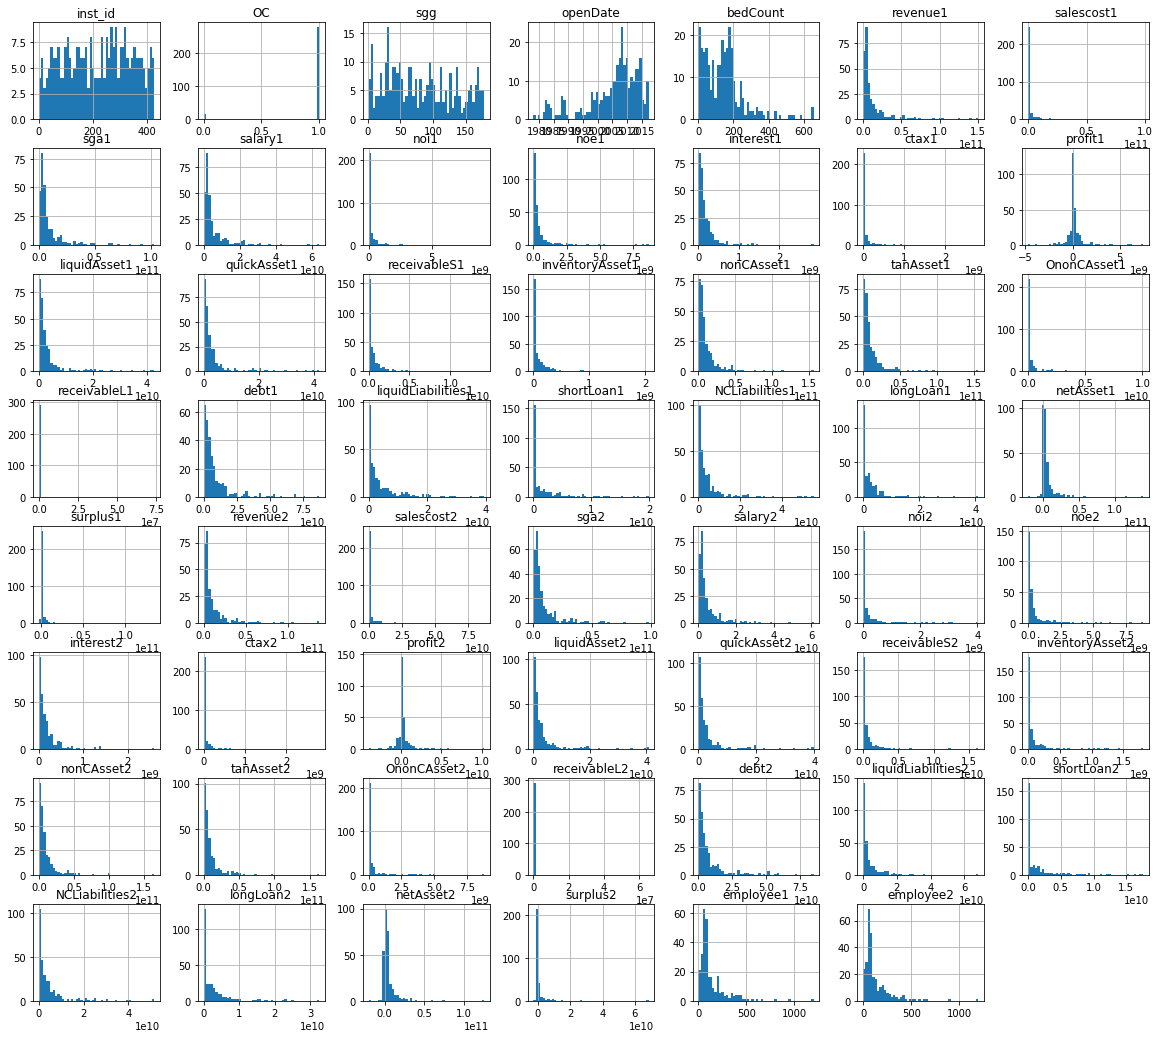

In [54]:
train_1.hist(bins=50, figsize=(20,18))

In [55]:
train_1['OC'] = train['OC'].map({' close':0, 'open':1})

In [56]:
train_2 = train_1[['OC','employee1','employee2','sido','sgg','instkind','bedCount']] #병원 규모
train_2.head()

,OC,employee1,employee2,sido,sgg,instkind,bedCount
0,1,62.0,64.0,choongnam,73,nursing_hospital,175.0
2,1,234.0,1.0,gyeonggi,89,nursing_hospital,468.0
3,1,663.0,663.0,incheon,141,general_hospital,353.0
4,1,206.0,197.0,gyeongnam,32,general_hospital,196.0
5,1,397.0,390.0,gyeongnam,155,general_hospital,243.0


In [57]:
train_3 = train_1[['OC','profit1','profit2','debt1','debt2','revenue1','revenue2','liquidAsset1','liquidAsset2','interest1','interest2']] #병원 재무 상태
train_3.head()

,OC,profit1,profit2,debt1,debt2,revenue1,revenue2,liquidAsset1,liquidAsset2,interest1,interest2
0,1,225169678.0,207829685.0,6.828260e+08,7.589937e+08,4.217530e+09,4.297848e+09,1.012700e+09,8.301695e+08,1.323624e+07,1.568305e+07
2,1,41864754.0,0.0,9.241434e+07,0.000000e+00,1.004522e+09,0.000000e+00,2.724421e+08,0.000000e+00,0.000000e+00,0.000000e+00
3,1,902830288.0,838387466.0,4.236380e+10,3.775501e+10,7.250734e+10,6.685834e+10,1.304154e+10,1.112572e+10,1.196881e+09,1.277422e+09
4,1,80749696.0,32642585.0,4.989811e+10,5.143259e+10,4.904354e+10,4.808280e+10,6.317084e+09,4.906776e+09,1.307249e+09,1.349851e+09
5,1,-46227375.0,74685954.0,0.000000e+00,0.000000e+00,3.358054e+10,3.433445e+10,5.635105e+09,4.869419e+09,3.364622e+08,4.155104e+08


In [58]:
train_4 = train_1[['OC','salary1','salary2','employee1','employee2']] #병원 직원
train_4.head()

,OC,salary1,salary2,employee1,employee2
0,1,2.033835e+09,2.063787e+09,62.0,64.0
2,1,2.964023e+08,0.000000e+00,234.0,1.0
3,1,3.178605e+10,2.971135e+10,663.0,663.0
4,1,2.446078e+10,2.346004e+10,206.0,197.0
5,1,1.665533e+10,1.638792e+10,397.0,390.0


In [59]:
train_2['employee'] = train_2.employee1 - train_2.employee2
train_2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,OC,employee1,employee2,sido,sgg,instkind,bedCount,employee
0,1,62.0,64.0,choongnam,73,nursing_hospital,175.0,-2.0
2,1,234.0,1.0,gyeonggi,89,nursing_hospital,468.0,233.0
3,1,663.0,663.0,incheon,141,general_hospital,353.0,0.0
4,1,206.0,197.0,gyeongnam,32,general_hospital,196.0,9.0
5,1,397.0,390.0,gyeongnam,155,general_hospital,243.0,7.0


In [60]:
train_3['profit'] = train_3.profit1 - train_3.profit2
train_3['debt'] = train_3.debt1 - train_3.debt2
train_3['revenue'] = train_3.revenue1- train_3.revenue2
train_3['interest'] = train_3.interest1 - train_3.interest2
train_3['liquidAsset'] = train_3.liquidAsset1 - train_3.liquidAsset2
train_3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,OC,profit1,profit2,debt1,debt2,revenue1,revenue2,liquidAsset1,liquidAsset2,interest1,interest2,profit,debt,revenue,interest,liquidAsset
0,1,225169678.0,207829685.0,6.828260e+08,7.589937e+08,4.217530e+09,4.297848e+09,1.012700e+09,8.301695e+08,1.323624e+07,1.568305e+07,17339993.0,-7.616775e+07,-8.031824e+07,-2446810.0,1.825302e+08
2,1,41864754.0,0.0,9.241434e+07,0.000000e+00,1.004522e+09,0.000000e+00,2.724421e+08,0.000000e+00,0.000000e+00,0.000000e+00,41864754.0,9.241434e+07,1.004522e+09,0.0,2.724421e+08
3,1,902830288.0,838387466.0,4.236380e+10,3.775501e+10,7.250734e+10,6.685834e+10,1.304154e+10,1.112572e+10,1.196881e+09,1.277422e+09,64442822.0,4.608787e+09,5.649006e+09,-80540715.0,1.915823e+09
4,1,80749696.0,32642585.0,4.989811e+10,5.143259e+10,4.904354e+10,4.808280e+10,6.317084e+09,4.906776e+09,1.307249e+09,1.349851e+09,48107111.0,-1.534487e+09,9.607370e+08,-42602315.0,1.410308e+09
5,1,-46227375.0,74685954.0,0.000000e+00,0.000000e+00,3.358054e+10,3.433445e+10,5.635105e+09,4.869419e+09,3.364622e+08,4.155104e+08,-120913329.0,0.000000e+00,-7.539098e+08,-79048185.0,7.656857e+08


In [61]:
train_4['salary'] = train_4.salary1 - train_4.salary2
train_4['employee'] = train_4.employee1 - train_4.employee2
train_4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OC,salary1,salary2,employee1,employee2,salary,employee
0,1,2.033835e+09,2.063787e+09,62.0,64.0,-2.995207e+07,-2.0
2,1,2.964023e+08,0.000000e+00,234.0,1.0,2.964023e+08,233.0
3,1,3.178605e+10,2.971135e+10,663.0,663.0,2.074703e+09,0.0
4,1,2.446078e+10,2.346004e+10,206.0,197.0,1.000740e+09,9.0
5,1,1.665533e+10,1.638792e+10,397.0,390.0,2.674107e+08,7.0


In [62]:
display(train_2.isnull().sum())
display(train_3.isnull().sum())
display(train_4.isnull().sum())

OC            0
employee1     8
employee2    11
sido          0
sgg           0
instkind      1
bedCount      5
employee     12
dtype: int64

OC              0
profit1         0
profit2         0
debt1           0
debt2           0
revenue1        0
revenue2        0
liquidAsset1    0
liquidAsset2    0
interest1       0
interest2       0
profit          0
debt            0
revenue         0
interest        0
liquidAsset     0
dtype: int64

OC            0
salary1       0
salary2       0
employee1     8
employee2    11
salary        0
employee     12
dtype: int64

In [63]:
train_2.loc[train_2['employee'] != train_2['employee'],'employee'] = 0
train_2.loc[train_2['employee1'] != train_2['employee1'],'employee1'] = 0
train_2.loc[train_2['employee2'] != train_2['employee2'],'employee2'] = 0

train_2.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


OC           0
employee1    0
employee2    0
sido         0
sgg          0
instkind     1
bedCount     5
employee     0
dtype: int64

In [64]:
train_4.loc[train_4['employee'] != train_4['employee'],'employee'] = 0
train_4.loc[train_4['employee1'] != train_4['employee1'],'employee1'] = 0
train_4.loc[train_4['employee2'] != train_4['employee2'],'employee2'] = 0

train_4.isnull().sum()

OC           0
salary1      0
salary2      0
employee1    0
employee2    0
salary       0
employee     0
dtype: int64

In [65]:
train_2[train_2.bedCount.isnull()==True]

,OC,employee1,employee2,sido,sgg,instkind,bedCount,employee
71,0,85.0,74.0,jeonbuk,26,traditional_hospital,NaN,11.0
193,0,15.0,15.0,gyeonggi,12,NaN,NaN,0.0
297,0,79.0,79.0,choongnam,159,hospital,NaN,0.0
298,0,0.0,0.0,gyeongbuk,107,hospital,NaN,0.0
300,1,15.0,15.0,seoul,79,traditional_hospital,NaN,0.0


In [44]:
train_1[train_1.instkind=='hospital']['bedCount'].mean()

96.22093023255815

In [47]:
train_1[train_1.instkind=='traditional_hospital']['bedCount'].mean()

46.666666666666664